<h1>Option #1</h1>

In [1]:
import pandas as pd
import numpy as np
from tensorflow import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


<h1>Read csv</h1>

In [2]:
dataset = pd.read_csv('datasets/crop_recommendationv2.csv')
dataset

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts


<h1>Data Preparation</h1>

In [3]:
dataset.tail()


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts
8799,25,55,22,33.191011,52.475590,6.727969,32.812965,groundnuts


In [4]:
# Change all the columns names into lowercases
df = pd.DataFrame(dataset)
df.columns = df.columns.str.lower()
df



,nitrogen,phosphorus,potassium,temperature,humidity,ph_value,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts


In [5]:
# Check for null values
print(df.isna().sum())

# Columns information
print(df.info())

# Check for duplicate dataset
print(df.duplicated().sum())

nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph_value       0
rainfall       0
crop           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     8800 non-null   int64  
 1   phosphorus   8800 non-null   int64  
 2   potassium    8800 non-null   int64  
 3   temperature  8800 non-null   float64
 4   humidity     8800 non-null   float64
 5   ph_value     8800 non-null   float64
 6   rainfall     8800 non-null   float64
 7   crop         8800 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 550.1+ KB
None
0


In [6]:
# Split data into X and Y
X = df.drop('crop', axis=1)
y = df['crop']
print(f'Number of samples in the dataset : {X.shape[0]}')
print(f'Number features for each exmaple : {X.shape[1]}')
print(f'Features : {X.columns}')

print(f'Possible output classes : {y.unique()}')

Number of samples in the dataset : 8800
Number features for each exmaple : 7
Features : Index(['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity',
       'ph_value', 'rainfall'],
      dtype='object')
Possible output classes : ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute'
 'coffee' 'groundnuts']


In [20]:
# Convert the output strings into numeric equivalent
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y)
print(np.unique(y))

# Convert the y value to one-hot encoding
labels_categorical = to_categorical(y_label_encoded)
print(labels_categorical)

['banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton' 'grapes'
 'groundnuts' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<h1>Building and training a model</h1>

In [8]:
# Standardize the X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split the dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels_categorical, test_size=0.2, random_state=42)


In [10]:
# Build a model

from keras.regularizers import l2, l1_l2, l1
from keras.layers import Dropout

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.01)))
    model.add(Dense(32, activation='relu',  kernel_regularizer=l2(0.01)))
    model.add(Dense(labels_categorical.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# def build_model():
#     model = Sequential()
#     model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(labels_categorical.shape[1], activation='softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model


In [11]:
# Training the model
model = build_model()

# history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data=(X_test, y_test), shuffle=True, verbose=1,)
history = model.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/100


C:\Users\GIBETIROL\.conda\envs\is2\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4871 - loss: 2.5733 - val_accuracy: 0.8608 - val_loss: 1.0630
Epoch 2/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8913 - loss: 0.9673 - val_accuracy: 0.9062 - val_loss: 0.7986
Epoch 3/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.9158 - loss: 0.7634 - val_accuracy: 0.9247 - val_loss: 0.6749
Epoch 4/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.9243 - loss: 0.6621 - val_accuracy: 0.9162 - val_loss: 0.6098
Epoch 5/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.9269 - loss: 0.5905 - val_accuracy: 0.9297 - val_loss: 0.5547
Epoch 6/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.9246 - loss: 0.5548 - val_accuracy: 0.9240 - val_loss: 0.5280
Epoch 7/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.9283 - loss: 0.5240 - val_accuracy: 0.9212 - val_loss: 0.4883
Epoch 8/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9299 - loss: 0.4923 - val_ac

In [16]:
# Evalutate the prediction
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

Test loss: 0.2342, Test accuracy: 0.9352


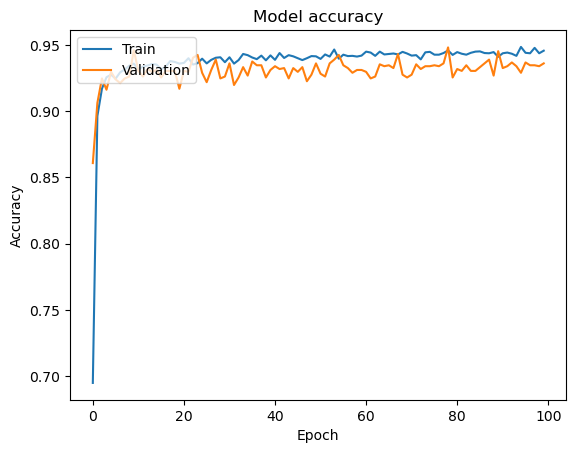

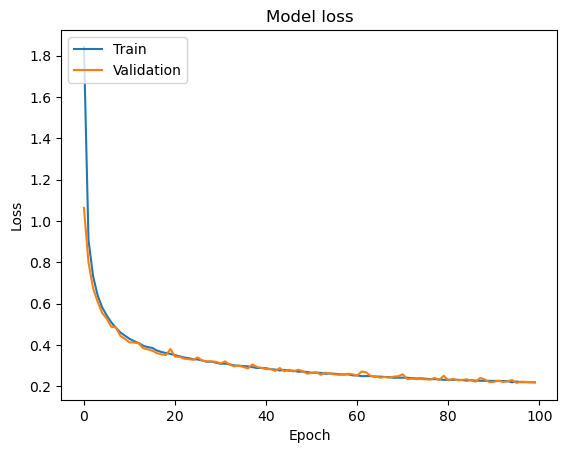

Best Accuracy on Validation Set = 0.9481534361839294


In [17]:
# Visualize
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

In [25]:
# # Get the accuracy score
# y_pred_one_hot = model.predict(X_test)
# y_pred = np.argmax(y_pred_one_hot, axis=1)
# y_test_labels = np.argmax(y_test, axis=1)

# # Convert the predictions into original labels
# y_pred_labels = label_encoder.inverse_transform(y_pred)
# y_test_labels_readable = label_encoder.inverse_transform(y_test_labels)
# print(y_test_labels_readable)

# Sample Data

y_pred_one_hot = model.predict(X_test)

# Convert probalities to class label
y_pred = np.argmax(y_pred_one_hot, axis=1)

# Convert one-hot encoded to labels of the class labels
y_test_labels = np.argmax(y_test, axis=1)

# Print orgina class labels
print(label_encoder.inverse_transform(y_test_labels))

accuracy = accuracy_score(y_pred, y_test_labels)
print(f'Accuracy : {accuracy * 100:.2f}%')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
['rice' 'mothbeans' 'mothbeans' ... 'pomegranate' 'jute' 'kidneybeans']
Accuracy : 93.52%


In [15]:
N = 95.00 #Nitrogen
P = 39.00 #Phosphorus
K = 29.00  # Potassium
T = 27.35  # Temperature
H = 55.99  # Humidity
pH = 7.13 # PH value
R = 148.98# Rainfall

user_testing = np.array([[N, P, K, T, H, pH, R]])
user_y_pred_one_hot = model.predict(user_testing)
y_label = np.argmax(user_y_pred_one_hot, axis=1)
print(f'Output : {label_encoder.inverse_transform(y_label)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Output : ['pigeonpeas']
